## Health Condition using 'hcond' and 'hcondnew'
### By Gavin Qu - May 23rd 2024
#### Data Extraction 

-	Encode hcond and new healthcond variables correctly 
-	Note that individuals are asked about pre-existing health conditions on their first interview in the UKHLS – the hcond (i) variable, where i codes different conditions – and then asked whether they have developed new conditions in subsequent interviews – the hcondn(i) variable in waves 1-9 and hcondnew(i) in waves 10 onwards.
-	hcond in wave 1 and new entrants for succeeding waves, hcondn in wave 1-9, hcondnew in wave 10-13

For example, hcond1-19 has 1, 3-13 waves, and it's for new interviewees only. While hcondn1-19 have 2-9 waves asking the existing interviewees about newly devloped conditions, and hcondnew1-19 have wave 9-13 for the same questions. 
hcond21 and hcondnew21 only exist from wave 10-13, while hcondnew22 only exist from 10-13. 

'dcsedfl_dv' is death data, but it's onyl 50% accurate when it comes to health mortality

To check whether the long panel dataset you created has all the correct values, including the special codes like missing values, proxy, refusal, etc., you can use pandas to display the unique values for each variable. This way, you can verify that all expected values are present in the dataset.
**Here's a script that:**
- Loads the long panel dataset.
- Displays the unique values for each variable.
- Checks for the presence of the specified special codes.

In [3]:
import pandas as pd
import os

# Load the long panel data from the Stata file
long_panel_data_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/long_panel_ukhls_hcond_data.dta'
long_panel_data = pd.read_stata(long_panel_data_path)

# Define the special codes to check
special_codes = {
    'missing': -9,
    'proxy': -7,
    'refusal': -2,
    'don\'t know': -1,
    'not mentioned': 0,
    'mentioned': 1
}

# Function to check special codes in each variable
def check_special_codes(df, special_codes):
    for column in df.columns:
        if column not in ['pidp', 'wave', 'variable']:
            unique_values = df[column].unique()
            print(f"Unique values in column '{column}': {unique_values}")
            for code_name, code_value in special_codes.items():
                if code_value in unique_values:
                    print(f"  {code_name} ({code_value}) is present in column '{column}'")
                else:
                    print(f"  {code_name} ({code_value}) is NOT present in column '{column}'")
        else:
            unique_values = df[column].unique()
            print(f"Unique values in column '{column}': {unique_values}")

# Check for special codes in the long panel dataset
check_special_codes(long_panel_data, special_codes)

Unique values in column 'pidp': [  68001367   68004087   68006127 ... 1644552890 1644675410 1649095330]
Unique values in column 'wave': ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm']
Unique values in column 'variable': ['a_hcond11' 'a_hcond13' 'a_hcond5' 'a_hcond7' 'a_hcond1' 'a_hcond15'
 'a_hcond17' 'a_hcond9' 'a_hcond10' 'a_hcond14' 'a_hcond16' 'a_hcond12'
 'a_hcond8' 'a_hcond3' 'a_hcond6' 'a_hcond2' 'a_hcond4' 'b_hcondn9'
 'b_hcondn1' 'b_hcondn6' 'b_hcondn11' 'b_hcondn10' 'b_hcondn8' 'b_hcondn4'
 'b_hcondn7' 'b_hcondn17' 'b_hcondn14' 'b_hcondn2' 'b_hcondn3' 'b_hcondn5'
 'b_hcondn15' 'b_hcondn16' 'b_hcondn13' 'b_hcondn12' 'c_hcondn17'
 'c_hcondn10' 'c_hcondn1' 'c_hcond11' 'c_hcond14' 'c_hcond3' 'c_hcondn13'
 'c_hcondn15' 'c_hcond17' 'c_hcondn4' 'c_hcond1' 'c_hcond7' 'c_hcondn3'
 'c_hcondn11' 'c_hcondn14' 'c_hcondn5' 'c_hcond5' 'c_hcond4' 'c_hcond9'
 'c_hcondn12' 'c_hcondn2' 'c_hcond16' 'c_hcondn16' 'c_hcond6' 'c_hcond13'
 'c_hcond15' 'c_hcond8' 'c_hcond2' 'c_hcondn9' 'c_hcond1

### New approach to include the disdif and hcond along with age and death value in the regular panel format: 
1. Load the wave data and extract age variables.
2. Combine data from all waves.
3. Load and merge death information.
4. Clean the combined data.
5. Save the cleaned combined data.


In [1]:
import pandas as pd
import os

# Base directory containing the data files
base_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'

# List of base variable names to extract, including 'pidp'
base_hcond_variables = [
    'pidp', 'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7',
    'hcond8', 'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14',
    'hcond15', 'hcond16', 'hcond17', 'hcond21', 'hcond22',
    'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7',
    'hcondn8', 'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14',
    'hcondn15', 'hcondn16', 'hcondn17', 'hcondnew1', 'hcondnew2',
    'hcondnew3', 'hcondnew4', 'hcondnew5', 'hcondnew6', 'hcondnew7', 'hcondnew8',
    'hcondnew10', 'hcondnew11', 'hcondnew12', 'hcondnew13', 'hcondnew14', 'hcondnew15',
    'hcondnew16'
]

base_disdif_variables = [f'disdif{i}' for i in range(1, 12)]

# Combine all variable names to extract
base_variables = ['pidp'] + base_hcond_variables[1:] + base_disdif_variables

# Wave prefixes from 'a' to 'm'
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Function to load and filter wave data
def load_wave_data(wave_prefix, base_dir, base_variables):
    file_path = os.path.join(base_dir, f'{wave_prefix}_indresp.dta')
    if os.path.exists(file_path):
        print(f"Loading data from {file_path}")
        wave_data = pd.read_stata(file_path, convert_categoricals=False)
        
        # Construct the actual variable names for the current wave
        wave_variables = [f'{wave_prefix}_{var}' if var != 'pidp' else var for var in base_variables]
        age_column = f'{wave_prefix}_age_dv'
        wave_variables.append(age_column)
        
        # Find the intersection of desired variables and available columns
        available_columns = set(wave_variables).intersection(wave_data.columns)
        print(f"Available columns in {wave_prefix}: {available_columns}")
        
        # Select only the available columns
        if available_columns:
            selected_data = wave_data[list(available_columns)].copy()
            selected_data['wave'] = wave_prefix
            return selected_data
    return None

# List to store data from each wave
all_waves_data = []

# Loop through wave prefixes
for prefix in wave_prefixes:
    wave_data = load_wave_data(prefix, base_dir, base_variables)
    if wave_data is not None:
        all_waves_data.append(wave_data)

# Combine all waves into a single DataFrame
if all_waves_data:
    combined_data = pd.concat(all_waves_data, ignore_index=True)

    # Load the death information from xhhrel.dta
    death_file_path = os.path.join(base_dir, 'xhhrel.dta')
    death_data = pd.read_stata(death_file_path, convert_categoricals=False)

    # Select the pidp and death column
    death_data = death_data[['pidp', 'dcsedfl_dv']]

    # Merge the death information with the combined data
    combined_data = combined_data.merge(death_data, on='pidp', how='left')

    # List of columns to clean (excluding 'pidp', 'wave', 'dcsedfl_dv', and age columns)
    age_columns = [f'{prefix}_age_dv' for prefix in wave_prefixes]
    columns_to_clean = [col for col in combined_data.columns if col not in ['pidp', 'wave', 'dcsedfl_dv'] + age_columns]

    # Clean the data: treat everything that's not a 1 as 0
    def clean_data(df, columns):
        df_cleaned = df.copy()
        for col in columns:
            df_cleaned[col] = df_cleaned[col].apply(lambda x: 1 if x == 1 else 0)
        return df_cleaned

    # Apply the cleaning function
    cleaned_combined_data = clean_data(combined_data, columns_to_clean)

    # Display the first few rows of the cleaned combined data
    print("Cleaned Combined Data Head:")
    print(cleaned_combined_data.head())

    # Save the cleaned combined data to a new Stata file
    output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'
    os.makedirs(output_dir, exist_ok=True)
    cleaned_combined_data_path = os.path.join(output_dir, 'cleaned_combined_ukhls_hcond_disdif_death_data.dta')
    cleaned_combined_data.to_stata(cleaned_combined_data_path, write_index=False)

    print(f"Cleaned combined data saved to {cleaned_combined_data_path}")
else:
    print("No data was loaded. Please check the file paths and variable names.")

Loading data from /Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/a_indresp.dta
Available columns in a: {'a_hcond17', 'a_disdif8', 'a_disdif5', 'a_hcond2', 'a_hcond6', 'a_hcond4', 'a_disdif1', 'a_hcond14', 'a_disdif3', 'a_disdif10', 'a_age_dv', 'a_disdif2', 'a_hcond8', 'a_hcond11', 'a_hcond1', 'a_disdif9', 'a_disdif6', 'a_disdif7', 'a_hcond13', 'a_hcond10', 'a_hcond9', 'a_hcond3', 'a_hcond5', 'a_hcond12', 'a_hcond16', 'a_disdif11', 'pidp', 'a_disdif4', 'a_hcond15', 'a_hcond7'}
Loading data from /Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/b_indresp.dta
Available columns in b: {'b_disdif5', 'b_hcondn5', 'b_disdif4', 'b_disdif9', 'b_hcondn10', 'b_hcondn8', 'b_hcondn1', 'b_hcondn13', 'b_hcondn9', 'b_disdif1', 'b_disdif6', 'b_hcondn2', 'b_hcondn11', 'b_hcondn16', 'b_hcondn17', 'b_hcondn6', 'b_disdif7', 'b_age_dv', 'b_disdif3', 'b_disdif11', 'b_disdif10', 'b_hcondn15', 'b_hcondn14', 'b_disdif8', 'b_disdif2', 'b_hcondn12'

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_94419/3811719406.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  wave_data = pd.read_stata(file_path, convert_categoricals=False)


Available columns in c: {'c_disdif3', 'c_hcondn11', 'c_hcond2', 'c_hcond15', 'c_hcond6', 'c_hcond16', 'c_disdif5', 'c_disdif4', 'c_hcondn1', 'c_hcond7', 'c_disdif6', 'c_hcondn7', 'c_hcond4', 'c_hcond13', 'c_disdif9', 'c_disdif11', 'c_hcond9', 'c_hcondn17', 'c_disdif7', 'c_hcond12', 'c_hcondn6', 'c_hcondn15', 'c_hcondn3', 'c_hcond14', 'c_hcondn5', 'c_hcond11', 'c_hcondn12', 'c_hcond1', 'c_hcond10', 'c_age_dv', 'c_disdif1', 'c_hcondn16', 'c_disdif2', 'c_hcond3', 'c_hcondn10', 'c_hcondn4', 'c_hcond5', 'c_disdif10', 'c_hcondn13', 'c_hcondn14', 'c_hcondn8', 'pidp', 'c_hcond8', 'c_hcondn2', 'c_disdif8', 'c_hcondn9', 'c_hcond17'}
Loading data from /Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/d_indresp.dta
Available columns in d: {'d_hcondn7', 'd_hcondn11', 'd_hcond9', 'd_hcondn16', 'd_hcondn8', 'd_disdif1', 'd_hcond4', 'd_hcond7', 'd_disdif10', 'd_disdif2', 'd_disdif11', 'd_hcond16', 'd_hcond15', 'd_hcond3', 'd_hcondn17', 'd_disdif4', 'd_hcond11', 'd_hcond

/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_94419/3811719406.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  wave_data = pd.read_stata(file_path, convert_categoricals=False)


Available columns in e: {'e_disdif5', 'e_hcond16', 'e_hcond2', 'e_hcond12', 'e_disdif2', 'e_disdif6', 'e_hcondn17', 'e_hcond1', 'e_hcondn2', 'e_hcond15', 'e_hcondn3', 'e_hcondn14', 'e_hcondn10', 'e_hcondn16', 'e_hcondn8', 'e_hcond9', 'e_disdif1', 'e_hcond10', 'e_hcond11', 'e_hcondn1', 'e_disdif7', 'e_disdif8', 'e_hcond6', 'e_hcond4', 'e_hcondn9', 'e_disdif9', 'e_hcondn4', 'e_hcondn12', 'e_hcond14', 'e_hcond17', 'e_hcond8', 'e_hcondn6', 'e_disdif11', 'e_hcond13', 'e_hcondn11', 'e_hcondn5', 'e_hcond3', 'e_hcondn15', 'e_hcond5', 'e_hcondn13', 'e_disdif3', 'pidp', 'e_hcond7', 'e_disdif10', 'e_age_dv', 'e_hcondn7', 'e_disdif4'}
Loading data from /Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls/f_indresp.dta
Available columns in f: {'f_hcondn17', 'f_hcond1', 'f_disdif8', 'f_hcondn5', 'f_hcond3', 'f_disdif10', 'f_disdif2', 'f_hcond2', 'f_hcondn13', 'f_disdif7', 'f_disdif4', 'f_hcondn7', 'f_disdif5', 'f_disdif6', 'f_hcond9', 'f_hcondn8', 'f_hcondn9', 'f_hcond10

The following script checks the value range of all the variables 

In [4]:
import pandas as pd
import os

# Define file paths
cleaned_combined_data_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/cleaned_combined_ukhls_hcond_disdif_death_data.dta'

# Load the cleaned combined data
cleaned_combined_data = pd.read_stata(cleaned_combined_data_path)

# Function to summarize the value range of each column
def summarize_value_ranges(df):
    summary = []
    for col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        unique_vals = df[col].unique()
        summary.append({
            'Column': col,
            'Min': min_val,
            'Max': max_val,
            'Unique Values': unique_vals
        })
    return pd.DataFrame(summary)

# Apply the function to the cleaned combined data
value_ranges_summary = summarize_value_ranges(cleaned_combined_data)

# Display the summary
print(value_ranges_summary)

# Optionally, save the summary to a CSV file for further inspection
value_ranges_summary_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/value_ranges_summary.csv'
value_ranges_summary.to_csv(value_ranges_summary_path, index=False)

print(f"Value ranges summary saved to {value_ranges_summary_path}")


         Column  Min  Max    Unique Values
0     a_hcond17    0    1           [0, 1]
1     a_disdif8    0    1           [0, 1]
2     a_disdif5    0    1           [0, 1]
3      a_hcond2    0    1           [0, 1]
4      a_hcond6    0    1           [0, 1]
..          ...  ...  ...              ...
538    m_hcond3    0    1           [0, 1]
539    m_hcond2    0    1           [0, 1]
540    m_hcond4    0    1           [0, 1]
541   m_disdif5    0    1           [0, 1]
542  dcsedfl_dv  1.0  3.0  [3.0, 1.0, nan]

[543 rows x 4 columns]
Value ranges summary saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/value_ranges_summary.csv


#### Calculate the frailty index using the cleaned data. Here’s the step-by-step approach:

1. Filter individuals aged 52-53: Include only individuals aged 52-53 and until either death or the last wave.
2. Convert to long panel format: Reshape the data to facilitate the calculation of the frailty index.
3. Calculate the frailty index: Calculate the frailty index for each individual at each point in time.
4. Assign a frailty index of 1 for deceased individuals: Set the frailty index to 1 for individuals who have died.

In [29]:
import pandas as pd
import os

# Define file paths
cleaned_combined_data_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/cleaned_combined_ukhls_hcond_disdif_death_data.dta'
frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_index.dta'
age_range_start = 52

# Load the cleaned combined data
cleaned_combined_data = pd.read_stata(cleaned_combined_data_path)

# Display the first few rows of the cleaned combined data
print("Cleaned Combined Data Head:")
print(cleaned_combined_data.head())

# Ensure the death column is present
print("Columns in cleaned_combined_data:")
print(cleaned_combined_data.columns)

# Function to filter individuals aged 52 and above
def filter_age_range(df, age_start, wave_prefixes):
    age_columns = [f'{prefix}_age_dv' for prefix in wave_prefixes]
    filtered_dfs = []
    for age_column in age_columns:
        if age_column in df.columns:
            filtered_dfs.append(df[df[age_column] >= age_start])
    return pd.concat(filtered_dfs, ignore_index=True)

# Function to calculate the frailty index for each wave
def calculate_frailty_index(df, wave_prefixes):
    total_deficits = 28
    for prefix in wave_prefixes:
        hcond_columns = [f'{prefix}_hcond{i}' for i in range(1, 18)]
        disdif_columns = [f'{prefix}_disdif{i}' for i in range(1, 12)]
        relevant_columns = hcond_columns + disdif_columns
        
        # Check for the existence of columns and replace missing ones with 0
        for col in relevant_columns:
            if col not in df.columns:
                df[col] = 0

        # Debugging: Check the list of relevant columns for the current wave
        print(f"Relevant Columns for Wave {prefix}:")
        print([col for col in relevant_columns if col in df.columns])

        # Calculate the frailty index
        df[f'{prefix}_frailty'] = df[relevant_columns].sum(axis=1) / total_deficits

        # Round the frailty index to 5 decimal places
        df[f'{prefix}_frailty'] = df[f'{prefix}_frailty'].round(5)

        # Debugging: Check the frailty index calculation for the current wave
        print(f"Frailty Index for Wave {prefix}:")
        print(df[[f'{prefix}_frailty']].head())
        
    return df

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Filter individuals aged 52 and above
filtered_data = filter_age_range(cleaned_combined_data, age_range_start, wave_prefixes)

# Ensure the death column is included in the filtered data
if 'dcsedfl_dv' not in filtered_data.columns:
    filtered_data = filtered_data.merge(cleaned_combined_data[['pidp', 'dcsedfl_dv']].drop_duplicates(), on='pidp', how='left')

# Display the first few rows of the filtered data
print("Filtered Data Head:")
print(filtered_data.head())

# Calculate the frailty index for each wave
frailty_data = calculate_frailty_index(filtered_data, wave_prefixes)

# Assign a frailty index of 1 for deceased individuals for each wave
for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    frailty_data.loc[frailty_data['dcsedfl_dv'] == 1, frailty_col] = 1

# Display the first few rows of the frailty data
print("Frailty Data Head:")
print(frailty_data[[col for col in frailty_data.columns if 'frailty' in col]].head())

# Save the frailty index data to a Stata file
frailty_data.to_stata(frailty_index_path, write_index=False)

print(f"Frailty index data saved to {frailty_index_path}")


Cleaned Combined Data Head:
   a_hcond17  a_disdif8  a_disdif5  a_hcond2  a_hcond6  a_hcond4  a_disdif1  \
0          0          0          0         0         0         0          0   
1          0          0          0         0         0         0          0   
2          0          0          0         0         0         0          0   
3          0          0          0         0         0         0          0   
4          0          0          1         1         0         0          1   

   a_hcond14  a_disdif3  a_disdif10  ...  m_hcond5  m_disdif4  m_disdif9  \
0          0          0           0  ...         0          0          0   
1          0          0           0  ...         0          0          0   
2          0          0           0  ...         0          0          0   
3          0          0           0  ...         0          0          0   
4          0          0           0  ...         0          0          0   

   m_hcondnew3  m_hcond16  m_hcond3  m_h

IndexError: index 12 is out of bounds for axis 0 with size 12

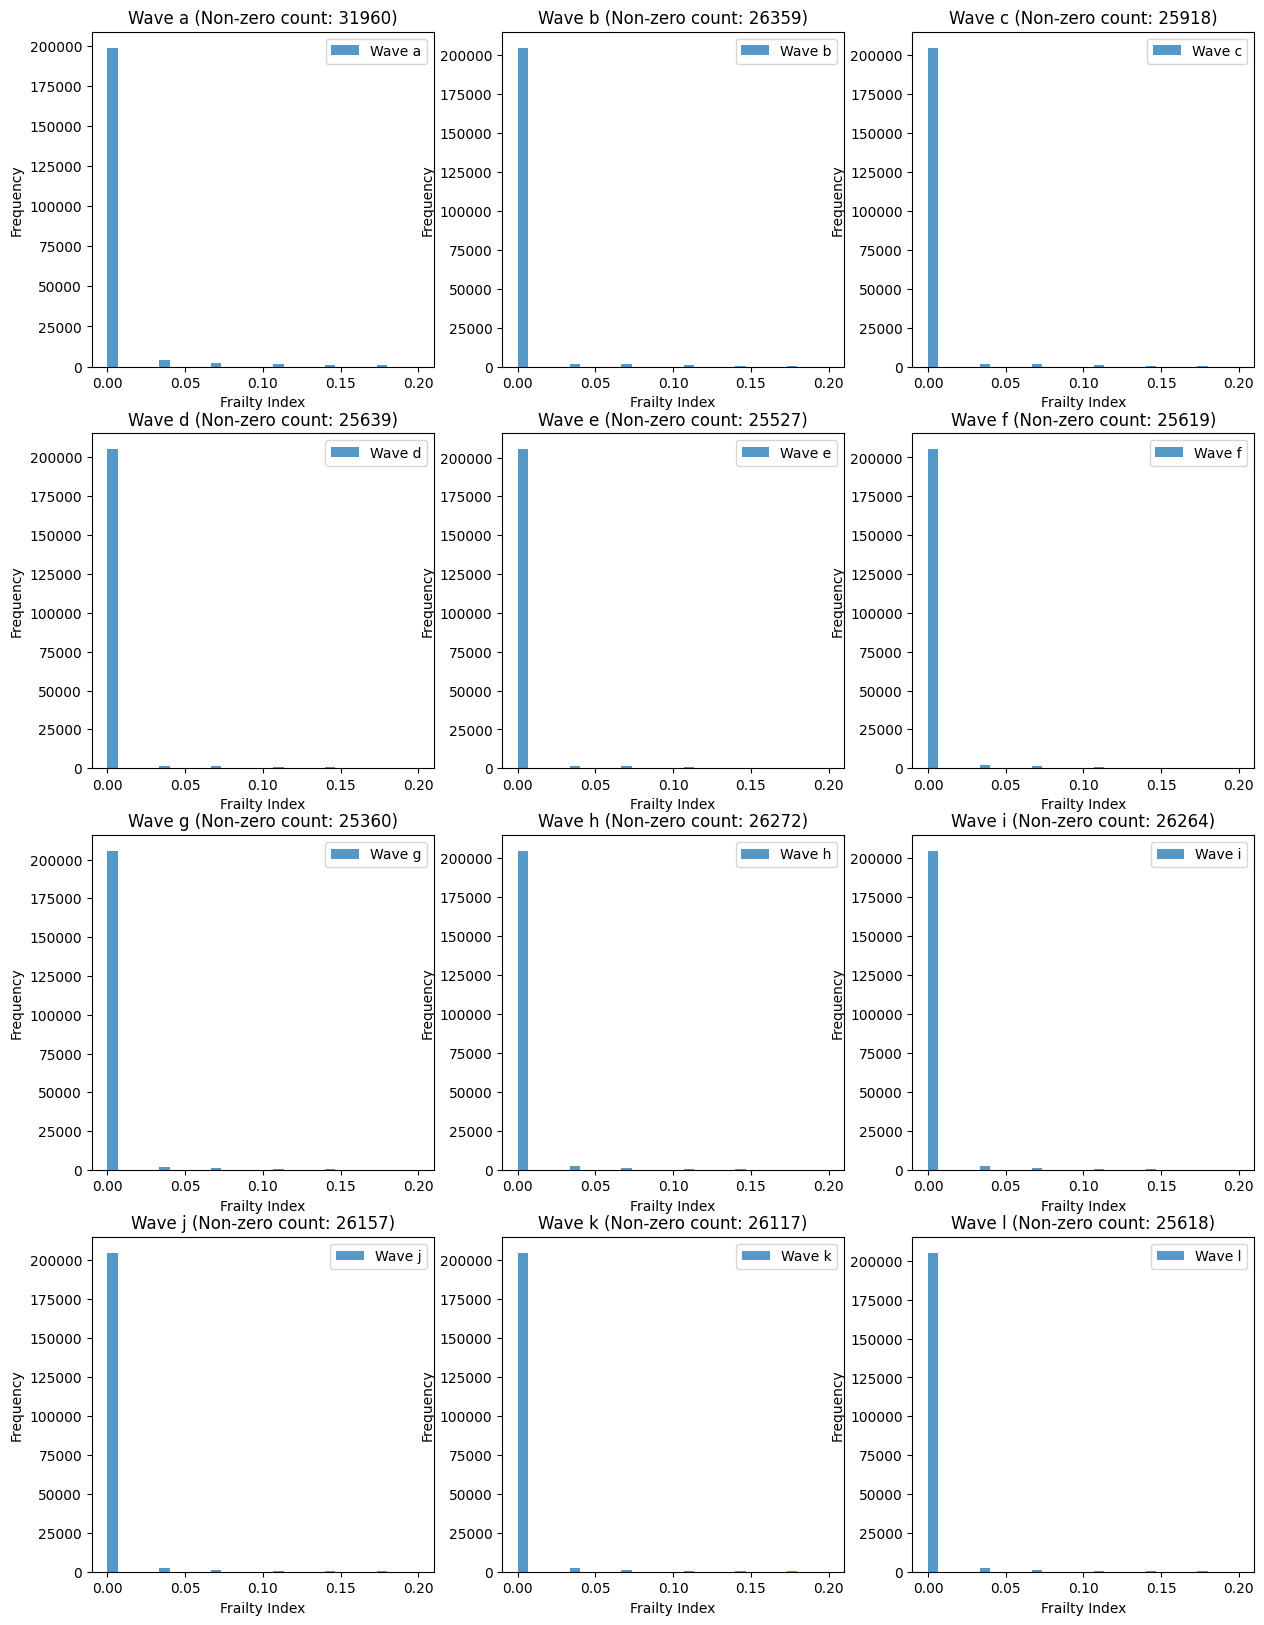

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the frailty index data
frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_index.dta'
frailty_data = pd.read_stata(frailty_index_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Plot the distribution of the frailty index for each wave
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, prefix in enumerate(wave_prefixes):
    frailty_col = f'{prefix}_frailty'
    if frailty_col in frailty_data.columns:
        non_zero_count = (frailty_data[frailty_col] > 0).sum()
        axes[i].hist(frailty_data[frailty_col].dropna(), bins=30, range=(0, 0.2), alpha=0.75, label=f'Wave {prefix}')
        axes[i].set_title(f'Wave {prefix} (Non-zero count: {non_zero_count})')
        axes[i].set_xlabel('Frailty Index')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

plt.tight_layout()
plt.show()


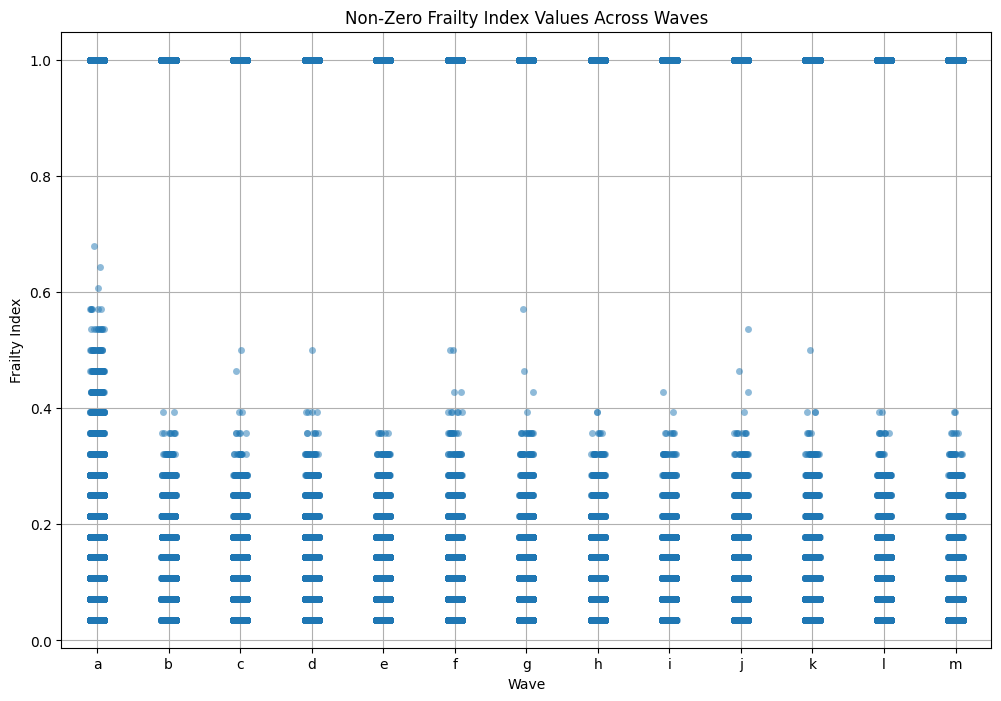

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the frailty index data
frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_index.dta'
frailty_data = pd.read_stata(frailty_index_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Prepare data for strip plot
strip_plot_data = pd.DataFrame()

for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    if frailty_col in frailty_data.columns:
        temp_df = frailty_data[['pidp', frailty_col]].copy()
        temp_df = temp_df[temp_df[frailty_col] > 0]  # Filter out zero frailty index values
        temp_df['wave'] = prefix
        temp_df = temp_df.rename(columns={frailty_col: 'frailty_index'})
        strip_plot_data = pd.concat([strip_plot_data, temp_df], ignore_index=True)

# Create strip plot with jitter
plt.figure(figsize=(12, 8))
sns.stripplot(x='wave', y='frailty_index', data=strip_plot_data, jitter=True, alpha=0.5)
plt.xlabel('Wave')
plt.ylabel('Frailty Index')
plt.title('Non-Zero Frailty Index Values Across Waves')
plt.grid(True)
plt.show()


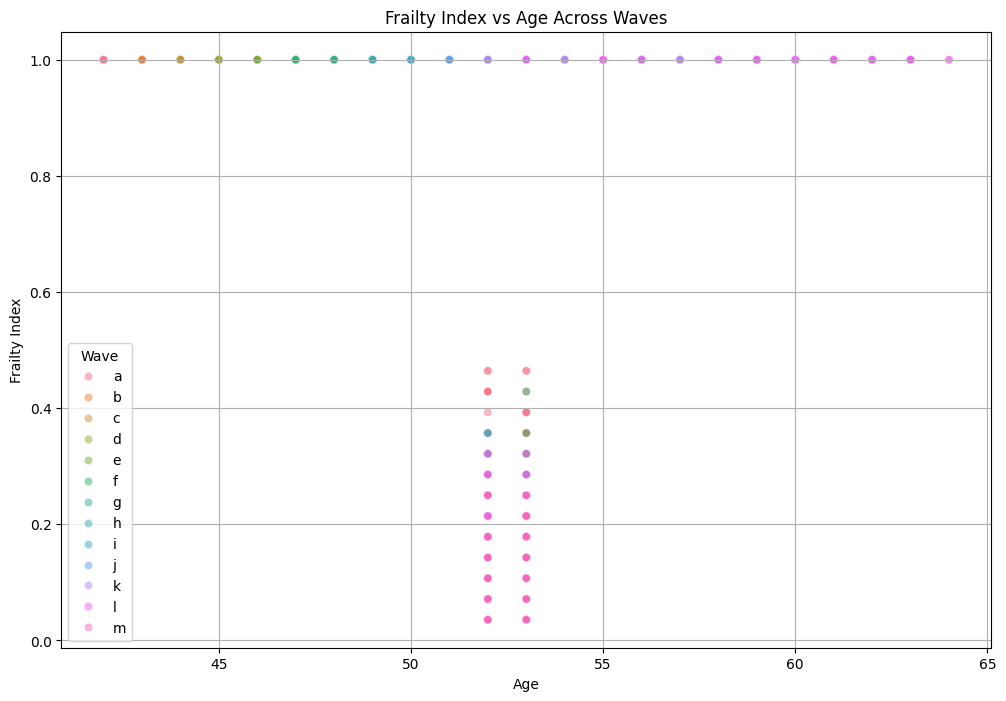

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the frailty index data
frailty_index_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/frailty_index.dta'
frailty_data = pd.read_stata(frailty_index_path)

# Define wave prefixes
wave_prefixes = [chr(i) for i in range(ord('a'), ord('n'))]

# Load the cleaned combined data to get the age variables
cleaned_combined_data_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/cleaned_combined_ukhls_hcond_disdif_death_data.dta'
combined_data = pd.read_stata(cleaned_combined_data_path)

# Prepare data for scatter plot
scatter_data = pd.DataFrame()

for prefix in wave_prefixes:
    frailty_col = f'{prefix}_frailty'
    age_col = f'{prefix}_age_dv'
    if frailty_col in frailty_data.columns and age_col in combined_data.columns:
        temp_df = frailty_data[['pidp', frailty_col]].copy()
        temp_age_df = combined_data[['pidp', age_col]].copy()
        temp_df = temp_df.merge(temp_age_df, on='pidp')
        temp_df = temp_df[temp_df[frailty_col] > 0]  # Filter out zero frailty index values
        temp_df['wave'] = prefix
        temp_df = temp_df.rename(columns={frailty_col: 'frailty_index', age_col: 'age'})
        scatter_data = pd.concat([scatter_data, temp_df], ignore_index=True)

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='frailty_index', hue='wave', data=scatter_data, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frailty Index')
plt.title('Frailty Index vs Age Across Waves')
plt.grid(True)
plt.legend(title='Wave')
plt.show()
